In [14]:
import sys
import tensorflow
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.models import Sequential 
from keras.models import model_from_json
from keras import optimizers

from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense,Conv2D, MaxPooling2D
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time
from PIL import Image

In [15]:
#ROOT_DIR=r"C:\Users\Ali Abbas\Fabric_Defect_Detector"
#MODEL_PATH = os.path.join(ROOT_DIR, "model.h5")
#print(MODEL_PATH)

In [16]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [17]:
#Loading vgc16 model
vgg16 = applications.VGG16(include_top=False, weights='imagenet')
#datagen = ImageDataGenerator(rescale=1. / 255) 
#needed to create the bottleneck .npy files

[INFO] loading and preprocessing image…
[[1.5639469e-14 1.0000000e+00]]
ID: 0, Label: Defected 0.0%
ID: 1, Label: Non_Defected 100.0%

Not Other
Final Decision:
.
..
...
{'Defected': 0, 'Non_Defected': 1}
ID: 1, Label: Non_Defected


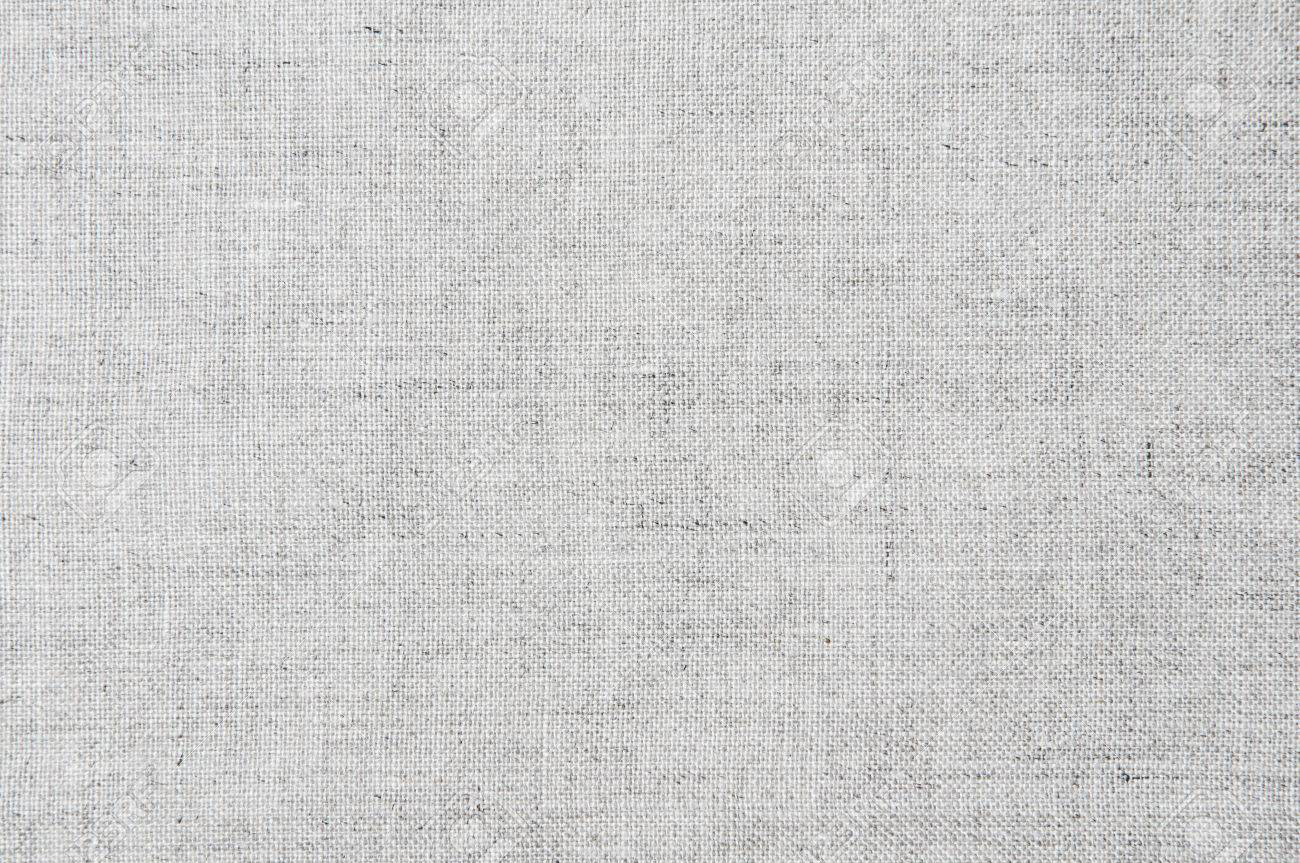

In [26]:
def read_image(file_path):
    print('[INFO] loading and preprocessing image…') 
    image = load_img(file_path, target_size=(224, 224)) 
    image = img_to_array(image) 
    image = np.expand_dims(image, axis=0)
    image /= 255. 
    return image
def test_single_image(path):
    Fabrics = ['Defected','Non_Defected']
    images = read_image(path)
    time.sleep(.5)
    bt_prediction = vgg16.predict(images) 
    preds = model.predict_proba(bt_prediction)
    print(preds)
    for idx, Fabric, x in zip(range(0,6), Fabrics , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, Fabric, round(x*100,2) ))
        if(round(x*100,2) > 65):
            print('\nNot Other')
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = model.predict_classes(bt_prediction)
    class_dictionary = {'Defected': 0, 'Non_Defected': 1} 
    print(class_dictionary)
    inv_map = {v: k for k, v in class_dictionary.items()} 
    print("ID: {}, Label: {}".format(class_predicted[0],  inv_map[class_predicted[0]])) 
    return load_img(path)

path = 'testing/ok.jpg'
test_single_image(path)